# Weather models : 2D parameters

The aim of this notebook is to indicate how to read the 2D data from weather models.
There are 2 weather models:
<ul>
    <li>a fine-mesh french weather model called 'AROME' (spatial resolution of 0.025°)</li>
    <li>a large-mesh french weather model called 'ARPEGE' (spatial resolution of 0.1°)</li>
</ul>

Per model, geographic zone ('NW' for North-West of France and 'SE' for South-East of France) and day, you have the model run of 00h with range forecasts from 00h to 24h. The time step is 1h.

Finally, the 2D data are stored in 4 different GRIB files, according to the vertical level:
<ul>
    <li>at 2m ('2m' in the file name) : temperature (in K), dew point temperature** (in K) and relative humidity (in %)</li>
    <li>at 10m ('10m' in the file name): wind speed (in m.s<sup>-1</sup>), wind direction (in degrees), U and V wind components*** (in m.s<sup>-1</sup>)</li>
    <li>at the sea level ('P_sea_level' in the file name) : mean sea level pressure (in Pa) </li>
    <li>at the ground level ('PRECIP' in the file name)  : total precipitation (in kg m<sup>-2</sup>) </li>
</ul>

** : temperature for which it is needed to refresh an air volume at constant pressure and humidity to become it saturated (i.e. condensation temperature)<br/>
*** : wind speed components, U : from west to east and V : from south to north. 

/!\ : about the total precipitation parameter, the range forecast begins to 1h and not 0h as the other parameters.

When you open a GRIB file with the library xarray, a new associated file of type .idx is created. 

In [1]:
from meteonet_toolbox.user_configuration import *
import xarray as xr
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap, cm 
import datetime as dt

## Parameters definition

In [2]:
####Cell containing the modifiable fields######
zone = "NW"     #geographic zone (NW or SE)
model = 'arome' #weather model (arome or arpege)
level = '2m'      #vertical level (2m, 10m, P_sea_level or PRECIP)
date = dt.datetime(2018, 5, 1,0,0) # Day example 

fname = "../../data_samples/weather_models/%s_%s_%s_%s.grib" % (model,level,zone,date.strftime('%Y%m%d%H%M%S'))

#parameter name in the file (cf cells below to know the parameter names -> exploration of metadata)
if level == '2m':
    param = 't2m'
elif level == '10m':
    param = 'u10'
elif level == 'PRECIP':
    param = 'tp'
else:
    param = 'msl'

step = 0                #index for the studied time step (cf cells below)

## Loading file name using parameters 

In [3]:
#coordinates of study zone boundaries
lllat=DOMAINS[zone]['lry']    #lower left latitude
urlat=DOMAINS[zone]['uly']    #upper right latitude
lllon=DOMAINS[zone]['ulx']    #lower left longitude
urlon=DOMAINS[zone]['lrx']    #upper right longitude

data = xr.open_dataset(fname, engine='cfgrib')   #data loading

## Quick field visualisation
The following comand shows the weather forecast at step 0 (analyse)  6/12/24 for temperature.
As the run chosed in parameter is the midnight run, the temperature at step 12 (figure 3) is the midday temperature. 
You can see that this temperature is higher than midnight (fig 1 and 4) or at 6AM (figure 2)

<IPython.core.display.Javascript object>


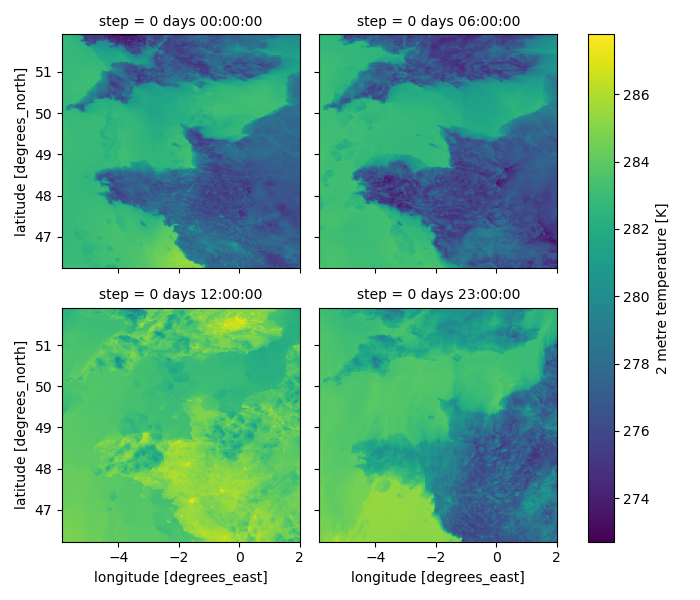

In [4]:
data.isel(step=[0, 6, 12, 23])[param].plot(x='longitude',
                                           y='latitude',
                                           col='step',
                                           col_wrap=2)

## Exploration of metadata 

Overview of the data -> print(data) to get the metadata : 

In [36]:
print(data)

<xarray.Dataset>
Dimensions:            (latitude: 227, longitude: 315, step: 25)
Coordinates:
    time               datetime64[ns] ...
  * step               (step) timedelta64[ns] 00:00:00 ... 1 days 00:00:00
    heightAboveGround  int32 ...
  * latitude           (latitude) float64 51.9 51.87 51.85 ... 46.3 46.27 46.25
  * longitude          (longitude) float64 -5.842 -5.817 -5.792 ... 1.983 2.008
    valid_time         (step) datetime64[ns] ...
Data variables:
    t2m                (step, latitude, longitude) float32 ...
    d2m                (step, latitude, longitude) float32 ...
    r                  (step, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             lfpw
    GRIB_centreDescription:  French Weather Service - Toulouse
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             French Weather Service - Toulouse
    history:                 2019-10-30T14:29:41 GRIB to CDM+CF via cfg

Get the information about coordinates (latitude and longitude):

In [37]:
coord = 'longitude'
data[coord]
vals = data[coord].values  #get the values
print(data[coord])

<xarray.DataArray 'longitude' (longitude: 315)>
array([-5.842, -5.817, -5.792, ...,  1.958,  1.983,  2.008])
Coordinates:
    time               datetime64[ns] ...
    heightAboveGround  int32 ...
  * longitude          (longitude) float64 -5.842 -5.817 -5.792 ... 1.983 2.008
Attributes:
    units:          degrees_east
    standard_name:  longitude
    long_name:      longitude


In [38]:
print(data[coord].units)  #example to get the information from attributes

degrees_east


Get the information about the run date and the different range forecasts:

In [39]:
run_date = data['time']
#run_date.values     #get the values
run_date

<xarray.DataArray 'time' ()>
array('2018-05-01T00:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time               datetime64[ns] 2018-05-01
    heightAboveGround  int32 ...
Attributes:
    long_name:      initial time of forecast
    standard_name:  forecast_reference_time

In [40]:
range_forecasts_dates = data['valid_time']
range_forecasts_dates

<xarray.DataArray 'valid_time' (step: 25)>
array(['2018-05-01T00:00:00.000000000', '2018-05-01T01:00:00.000000000',
       '2018-05-01T02:00:00.000000000', '2018-05-01T03:00:00.000000000',
       '2018-05-01T04:00:00.000000000', '2018-05-01T05:00:00.000000000',
       '2018-05-01T06:00:00.000000000', '2018-05-01T07:00:00.000000000',
       '2018-05-01T08:00:00.000000000', '2018-05-01T09:00:00.000000000',
       '2018-05-01T10:00:00.000000000', '2018-05-01T11:00:00.000000000',
       '2018-05-01T12:00:00.000000000', '2018-05-01T13:00:00.000000000',
       '2018-05-01T14:00:00.000000000', '2018-05-01T15:00:00.000000000',
       '2018-05-01T16:00:00.000000000', '2018-05-01T17:00:00.000000000',
       '2018-05-01T18:00:00.000000000', '2018-05-01T19:00:00.000000000',
       '2018-05-01T20:00:00.000000000', '2018-05-01T21:00:00.000000000',
       '2018-05-01T22:00:00.000000000', '2018-05-01T23:00:00.000000000',
       '2018-05-02T00:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
   

Get the information about the vertical level:

In [41]:
if (level =='2m' or level == '10m'):
    level_name = 'heightAboveGround'
elif (level =='P_sea_level'):
    level_name = 'meanSea'
else:
    level_name = 'surface'
info_level = data[level_name]
info_level

<xarray.DataArray 'heightAboveGround' ()>
array(2)
Coordinates:
    time               datetime64[ns] 2018-05-01
    heightAboveGround  int32 2
Attributes:
    long_name:      height above the surface
    units:          m
    positive:       up
    standard_name:  height

Get the information about one parameter: 
the parameter names in the GRIB file are indicated in the field 'Data variables' (cf print(data) above)

In [42]:
d = data[param]     #param : parameter name defined at the beginning of the Notebook 
d_vals=d.values     #get the values
###examples to get the information from attributes
#d.units                      #unit
#d.long_name                      #long name
d

<xarray.DataArray 't2m' (step: 25, latitude: 227, longitude: 315)>
array([[[282.61194, 282.58643, ..., 279.91745, 279.92368],
        [282.71893, 282.6862 , ..., 279.97394, 279.97394],
        ...,
        [283.0427 , 283.0417 , ..., 277.72345, 277.8317 ],
        [283.0622 , 283.0607 , ..., 277.95242, 278.1937 ]],

       [[282.7061 , 282.69748, ..., 279.85086, 279.86392],
        [282.74634, 282.73218, ..., 279.95355, 279.95966],
        ...,
        [282.79907, 282.80045, ..., 277.2746 , 277.42224],
        [282.7491 , 282.75354, ..., 277.17578, 277.4536 ]],

       ...,

       [[283.171  , 283.14685, ..., 282.64142, 282.65613],
        [283.19736, 283.1685 , ..., 282.68777, 282.69803],
        ...,
        [284.92487, 284.90875, ..., 278.31348, 278.4048 ],
        [284.93848, 284.92126, ..., 278.12057, 278.6682 ]],

       [[283.30035, 283.2617 , ..., 282.7137 , 282.50967],
        [283.3387 , 283.29892, ..., 282.5665 , 282.41104],
        ...,
        [284.94653, 284.93973, ..., 

The structure of the parameter (3 dimensions):
<ul>
    <li>number of steps or range forecasts</li>
    <li>number of points in latitude</li>
    <li>number of points in longitude</li>   
</ul>

In [43]:
d_vals.shape

(25, 227, 315)

## Nice view using Basemap

Plot the parameter values for 1 given time step:

<IPython.core.display.Javascript object>


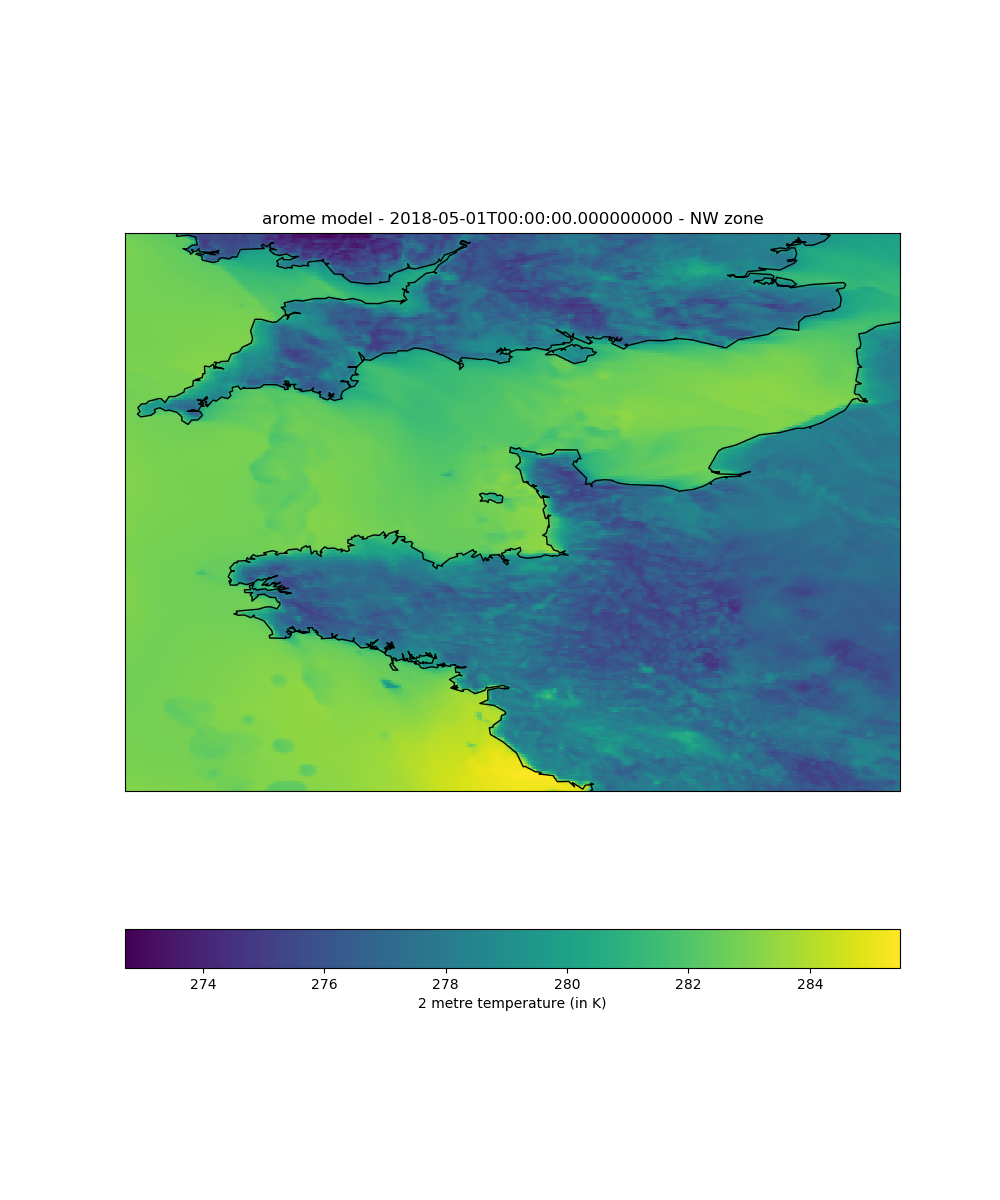

C:\Users\larvorg\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  import sys
C:\Users\larvorg\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  # This is added back by InteractiveShellApp.init_path()


In [44]:
fig,ax=plt.subplots(1,1,figsize=(10,12))

#background map definition : coordinates of corners, resolution, projection type
m = Basemap(epsg=n_epsg,resolution='i',llcrnrlat=lllat,
                  urcrnrlat=urlat,
                  llcrnrlon=lllon,
                  urcrnrlon=urlon)

#plot the data and the background map (coastlines and borders)
m.drawcoastlines()
m.drawcountries()
img=m.imshow(d_vals[step,:,:], interpolation='none', origin='upper')
plt.colorbar(img, orientation= 'horizontal').set_label(d.long_name+ ' (in '+d.units+ ')')
plt.title(model +" model - "+str(d['valid_time'].values[step])+" - " +zone + " zone")
plt.show()